<a href="https://colab.research.google.com/github/kharerahul002/Forecasting-Models/blob/master/RNN_LSTM_Quandl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import quandl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [0]:
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
df = quandl.get('BSE/BOM500325') #Reliance
df


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,115.0,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1991-01-03,107.5,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
1991-01-07,105.0,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
1991-01-09,105.0,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
1991-01-11,102.5,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1354.9,1495.00,1348.00,1417.35,1426.94,2452068.0,84839.0,3.498957e+09,298577.0,12.18,147.00,62.45
2020-04-27,1440.0,1474.55,1422.95,1430.30,1449.14,1152767.0,42860.0,1.670522e+09,204866.0,17.77,51.60,-9.70
2020-04-28,1451.4,1454.75,1391.95,1428.10,1421.15,1301548.0,49487.0,1.849695e+09,159436.0,12.25,62.80,-23.30


In [0]:
df.shape

(7091, 12)

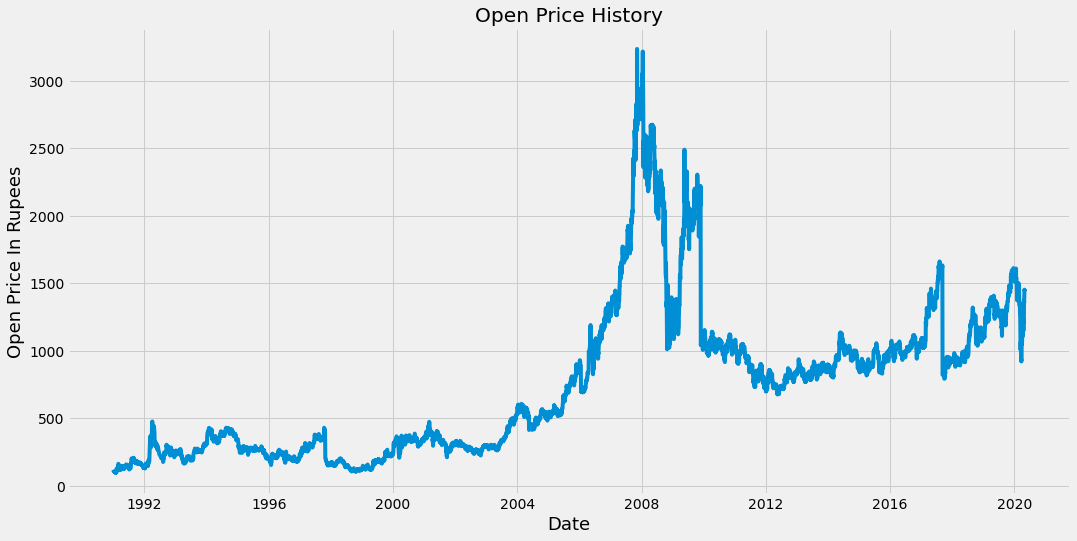

In [0]:
#visualize the open price
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price In Rupees', fontsize = 18)
plt.show()

In [0]:
#create new dataframe only with open column
data = df.filter(['Open'])
#convert the DataFrame into Numpy Array
dataset = data.values
#get the num of rows to train the model
training_data_len = math.ceil(len(dataset)* .8) #round up the data using math.ceil
training_data_len

5673

In [0]:
 #scale the data
 scaler = MinMaxScaler(feature_range=(0,1))
 scaled_data = scaler.fit_transform(dataset)

 scaled_data

array([[0.0071599 ],
       [0.00477327],
       [0.00397772],
       ...,
       [0.43242641],
       [0.43070804],
       [0.43325378]])

In [0]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

#split the data into x-train and y-train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0071599 , 0.00477327, 0.00397772, 0.00397772, 0.00318218,
       0.00477327, 0.00397772, 0.00198886, 0.        , 0.00318218,
       0.00159109, 0.00636436, 0.0071599 , 0.00954654, 0.00795545,
       0.0071599 , 0.00636436, 0.0043755 , 0.0043755 , 0.00636436,
       0.01113763, 0.01193317, 0.01431981, 0.0159109 , 0.01670644,
       0.01829753, 0.02187749, 0.01909308, 0.01949085, 0.01352426,
       0.01113763, 0.01312649, 0.00994431, 0.01034208, 0.01256961,
       0.0106603 , 0.01002387, 0.00747812, 0.01129674, 0.00875099,
       0.00795545, 0.00906921, 0.00938743, 0.01129674, 0.01129674,
       0.01002387, 0.01145585, 0.0106603 , 0.01384248, 0.01193317,
       0.0141607 , 0.01638823, 0.01718377, 0.01479714, 0.01607001,
       0.01575179, 0.01431981, 0.01225139, 0.01320605, 0.01400159])]
[0.011614956245027844]



In [0]:
 #convert the x-train and y-train into numpy array
 x_train, y_train = np.array(x_train), np.array(y_train)
 

In [0]:
#reshape the data
x_train = np.reshape(x_train ,(x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape

(5613, 60, 1)

In [0]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [0]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
5613/5613 [==============================] - 202s 36ms/step - loss: 8.6932e-04 - accuracy: 1.7816e-04


In [0]:
 #craete testing dataset
 #create a new array containing scaled values from index 5613 to 7091
 
 test_data = scaled_data[training_data_len - 60:, :]

 #create the datasets x_test, y_test
 x_test = []
 y_test = dataset[training_data_len:, :]

 for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i, 0])
   



In [0]:
#convert data into numpy array
x_test = np.array(x_test)


In [0]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
 #get the model predicted price values
 predictions = model.predict(x_test)
 predictions = scaler.inverse_transform(predictions)


In [0]:
#evaluate by rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.673078769958238

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


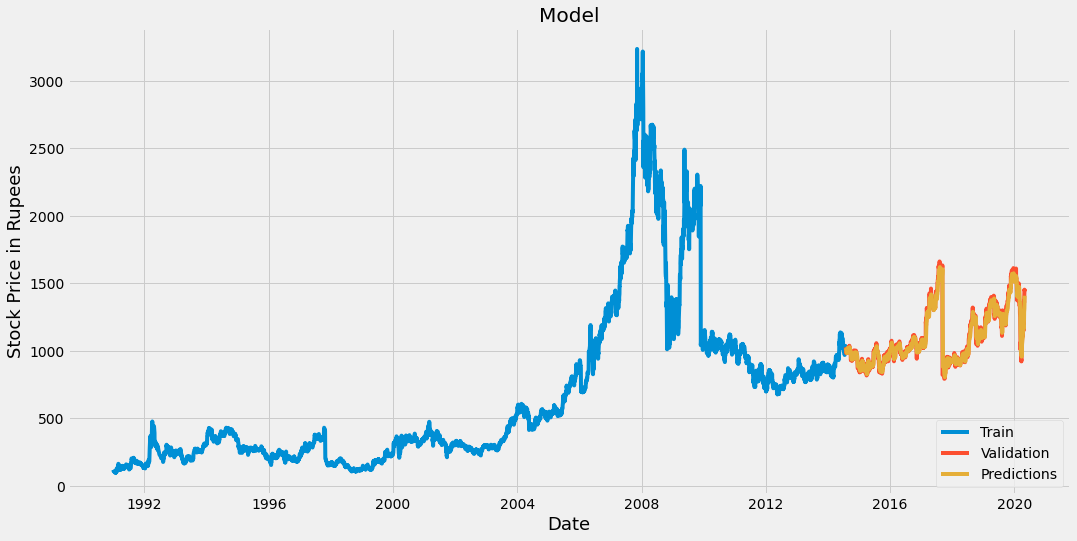

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Stock Price in Rupees', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

In [0]:
 #show the valid and acctual price
 valid

,Open,Predictions
Date,,
2014-07-28,1023.8,1024.933350
2014-07-30,1006.2,1023.823242
2014-07-31,1009.0,1015.333679
2014-08-01,998.4,1009.528564
2014-08-04,981.6,1002.908020
...,...,...
2020-04-24,1354.9,1284.702026
2020-04-27,1440.0,1312.403442
2020-04-28,1451.4,1355.560059
